<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Informe Laboratorio N°1
### Alumno: 
* $Axel$ $Nathanel$ $Nahum$
### Profesores: 
* $Mariano$ $Llamedo$ $Soria$
* $Israel$ $Jordan$ $Pavelek$
* $Cesar$ $Angel$ $Fuoco$

## Introduccion



En este informe nos encontraremos con el $análisis$ $del$ $filtro$ $a$ $diseñar$, además de los gráficos de la 
$respuesta$ $en$ $frecuencia$, $verificación$ $de$ $la$ $plantilla$, etc.

### Diagrama en bloques

<img src="./Diagrama en bloques.PNG" align="middle" width="600" /> 

Este breve $diagrama$ $en$ $bloques$ representa a la $salida$ del sistema frente a la $entrada$. Esta ultima pasando por el $filtro$ $Pasa-Bandas$.

### Breve introducción teórica

Para realizar este análisis se parte de una estructura $Chebyshev$ debido a que eso pide el ejercicio para lograr encontrar la $transferencia$ asociada con la plantilla. Partimos de una $plantilla$ y calculamos la $transferencia$ asociada a esta para posteriormente calcular los $componentes$ necesarios para cumplirla. 

Mediante las herramientas de $Python$ y $LTSpice$ se buscara una aproximación a los gráficos de $respuesta$ $en$ $frecuencia$ para posteriormente comparar con los obtenidos por parte del $analizador$ $de$ $audio$. Además, se observaran por parte de la primera, el $diagrama$ $de$ $polos$ y ceros y el $retardo$ $de$ $grupo$.

## Resolucion

### Resolucion original

In [1]:
from IPython.display import IFrame
IFrame("./Resolucion_Labo.pdf", width=900, height=1000)

En este PDF se observa la resolucion del ejercicio del circuito asociado a la $Datasheet$ del $integrado$ propuesto $(UAF42)$, ademas de la busqueda de la $transferencia$ asociada a la plantilla dada. Esta ultima se realizo mediante $Chebyshev$. Para lograr esto, se planteo la transferencia $Pasa-Bajos$ de orden 1 $Cheby$ y apartir de esa, se encontro la transferencia $Pasa-Bandas$ aplicando el nucleo asociado al $Pasa-Bandas$ ($Nu(s) = \frac{S^2 + 1}{S}$).  

Por otro lado encontraremos la $desnormalizacion$ de los componentes teniendo en cuentas los que ya te proporciona el $integrado$ $UAF42$ (se observara posteriormente el circuito que tiene la $Datasheet$). 

### Circuito_Datasheet:

<img src="./Circuito_Datasheet.PNG" align="middle" width="800" /> 

En este se observan los $parametros$ $de$ $diseño$ aparte del propio $circuito$. Ya hay valores por defecto $preestablecidos$ los cuales nos ayudan a tener una cierta $facilidad$ a la hora de $diseñar$ el filtro. Por otro lado, el circuito propuesto por la $Datasheet$ nos proporciona un filtro $no$ $inversor$ pero si ven detalladamente el $PDF$, se ve como este $invierte$ (los parametros son iguales pero la $transferencia$ quedo con un $menos$). Esto puede ser un $error$ dentro de la $Datasheet$ o mio propio. De todos modos, en la practica se observo que a una frecuencia de 6KHz (Frecuencia central) este $filtro$ $invertia$.

$Señal_6KHz:$

<img src="./Señal_6K_OSC.BMP" align="middle" width="600" /> 

En este grafico del $osciloscopio$ se ve como claramente hay un $desfasaje$ de $180°$ entre la $entrada$ y la $salida.$ Ademas se ve como la $ganancia$ en $6KHz$ se mantiene en $0dB$, cumpliendo la $plantilla$.

## Analisis por Python

In [6]:
# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
#
#%%  Inicialización de librerías (esto NO es parte del script demo_seg_orden1.py)
# Setup inline graphics: Esto lo hacemos para que el tamaño de la salida, 
# sea un poco más adecuada al tamaño del jupyter notebook documento

# algún bug cuando lo hice:
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

#%%  Fin - Inicialización de librerías

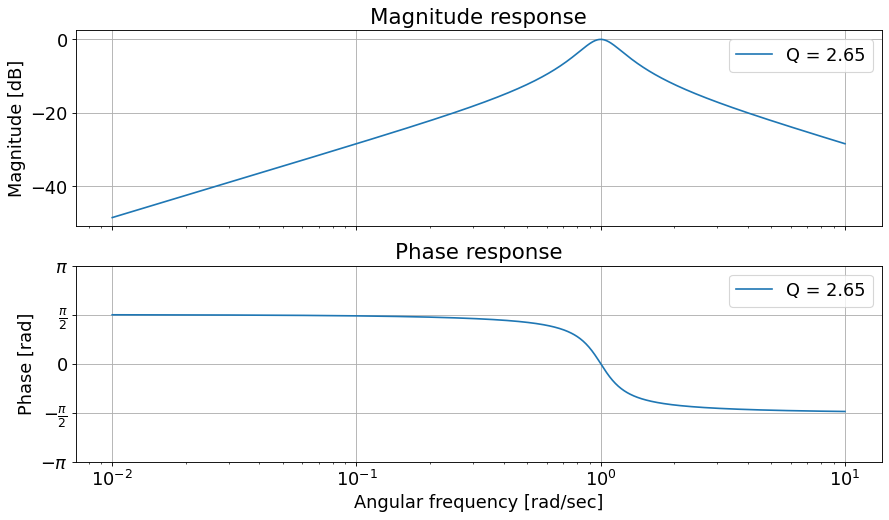

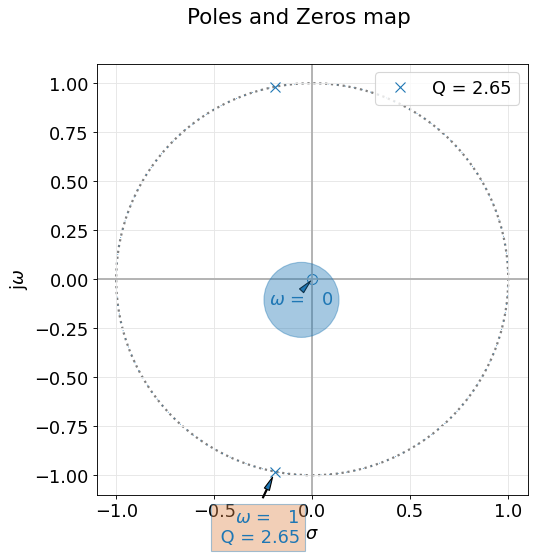

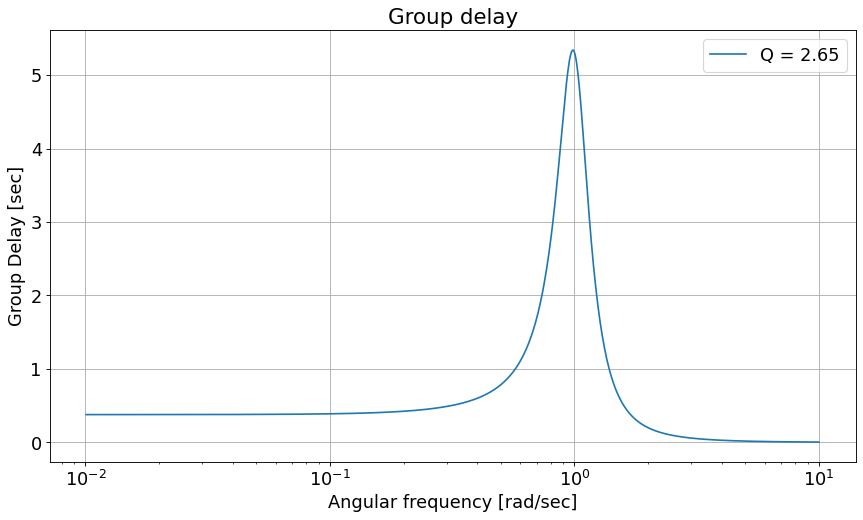

In [10]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

w0 = 2 * np.pi * 6000
Q = 3

qq = 2.65

# Orden del filtro
nn = 1

αmax = 2.5
e = np.sqrt(10**(αmax/10) - 1) # "epsilon"

Z,P,K = sig.cheb1ap(nn, αmax)
Num,Den = sig.zpk2tf(Z,P,K)
Num_mp,Den_mp = sig.lp2bp(Num,Den, bw = 1/Q)

TF = TransferFunction(Num_mp, Den_mp)

analyze_sys(TF, sys_name='Q = {:3.2f}'.format(qq))

En estos graficos podremos observar y analizar la $respuesta$ $en$ $frecuencia$ $normalizada$ en un $\omega_0$ de $1$ (este valor corresponde a hacer $ε^{(+1/n)}$, siendo n = 3 y e = 1). En este caso se observa un filtro $Pasa-Bandas$ $Chebyshev$ con polos ubicados en $$ y $\frac{\pi}{3}$ y $ceros$ en el eje $0$.

$La$ $transferencia$ $asociada$ $a$ $estos$ $graficos$ $es:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S.\frac{\omega_0}{Q}}{S^2 + S.\frac{\omega_0}{Q} + \omega_0^2}$$

$Donde:$

* $\omega_0 = 1$ y $Q = 2.65$. Esto es corresponde a una $transferencia$ $normalizada$.

En este caso nos encontramos con una $transferencia$ $calculada$ igual a:

$$ T(s) = \frac{V_2}{V_1} = \frac{0.378}{S^2 + 0.378 S + 1}$$

En el $PDF$ se ve como llega a esta transferencia. Este $0.378$ nos representa el $ancho$ $de$ $banda$ $normalizado$. De esta forma podemos calcular el $Q$, teniendo en cuenta un $\omega_0 = 1$. Para calcularlo, partimos de la siguiente $formula$.

$$Bw = \frac{\omega_0}{Q}$$

$Despejamos$ $y$ $hallamos$ $Q:$

$$Q = \frac{\omega_0}{Bw}$$

$$Q = \frac{1}{0.378}$$

$$Q = 2.65$$

Esto ultimo $verifica$ el $Q$ dado en el grafico de $Python.$

En esta ultima $transferencia$ podremos observar un filtro $Pasa-Bandas$ de $segundo$ $orden$. Esta se encuentra normalizada en $\omega_0 = 1$ pero se podria desnormalizar teniendo en cuenta otra S distinta. Esta seria igual a $\frac{Sn}{Ω\omega}$, donde Sn (domino de S normalizado) y Ω$\omega$ (norma de normalizacion de frecuencia). 

$Esta$ $nueva$ $transferencia$ $quedaria:$

$$ T(s) = \frac{V_2}{V_1} = \frac{S. \frac{Ω\omega_0}{Q}}{S^2 + S. \frac{Ω\omega_0}{Q} + Ω\omega_0^2}$$

$Donde:$

* $Ω\omega_0 = 2 * \pi * 6KHz$

Esta ultima sera representada por el grafico proximo de $LTSpice.$

## Circuito LTspice

<img src="./Circuito_Labo.PNG" align="middle" width="1050" /> 

## Respuesta en frecuencia LTspice (Frecuencia central)

<img src="./Respuesta_Frecuencia_LTS_1.PNG" align="middle" width="1000" /> 

## Respuesta en frecuencia LTspice (Frecuencia de corte)

<img src="./Respuesta_Frecuencia_LTS_2.PNG" align="middle" width="1000" /> 

Se observa como el filtro $Pasa-Bandas$ a una $frecuencia$ $central$ de $6KHz$, tiene una $ganancia$ de aproximadamente $0dB$. Ademas, a unas frecuencias de corte de $5.08KHz$ y $7.08KHz$, la tencuacion es de $2.5dB$. Esto ultimo cumple directamente con la plantilla pedida. $Esta$ $ultima$ $se$ $trata$ $de$:

<img src="./Plantilla.PNG" align="middle" width="700" /> 

Por otro lado, el $ancho$ $de$ $banda$ requerido es de $2KHz$. Esto sale de hacer la siguiente $cuenta$:

$$Bw = \frac{\omega_0}{Q}$$

$$Bw = \frac{6KHz}{3}$$

$$Bw = 2KHz$$ 

Se verifica con el $segundo$ $grafico$, el $ancho$ $de$ $banda$ es de $2KHz$.

## Respuesta en frecuencia (Analizador de audio)

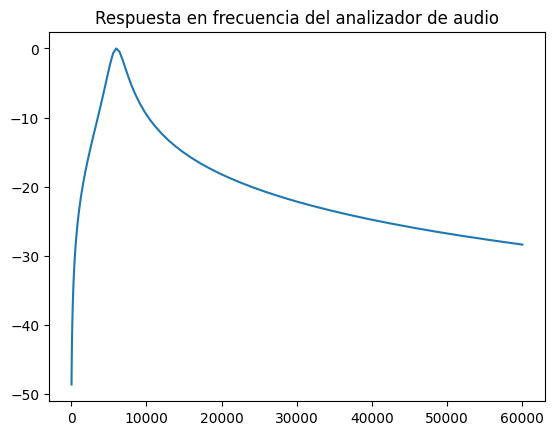

In [4]:
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig


RF1 = np.genfromtxt("RF1.csv", delimiter=",")

Frec_RF1 = RF1[:,0]
dB_RF1 = RF1[:,1]

plt.plot(Frec_RF1, dB_RF1)
plt.title("Respuesta en frecuencia del analizador de audio")
plt.show()

## Respuesta en frecuencia con valores medidos (Excel)

<img src="./Respuesta en frecuencia.PNG" align="middle" width="800" /> 

## Fase (Analizador de audio)

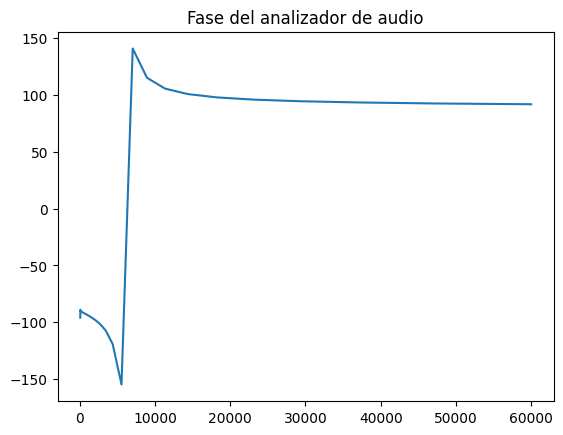

In [5]:
Fase = np.genfromtxt("Fase.csv", delimiter=",")

Frec_Fase = Fase[:,0]
Rad_Fase = Fase[:,1]

plt.plot(Frec_Fase, Rad_Fase)
plt.title("Fase del analizador de audio")
plt.show()

## Fase con valores medidos (Excel)

<img src="./Fase.PNG" align="middle" width="800" /> 

## Verificación de plantilla

<img src="./Atenuacion_5.08KHz.jpg" align="middle" width="600" /> 

De este $gráfico$ obtenemos los valores de $tensión$ de la $entrada (CH1 Amarillo)$ y $salida (CH2 Celeste)$. En este caso tenemos los$siguientes valores$:

$$Vi = 5.11V \quad y \quad Vo = 2.64V$$

Como se vio antes, una de las frecuencias de corte es $5.08KHz$, donde $la atenuación$ para esta deberá ser $2.5dB$ $aproximadamente$. Para verificar esto, se calculara $la ganancia$ en veces a partir de estos $valores$ $obtenidos$ $del$ $gráfico$ y se la pasara a $dB$ 

\vspace{0.3cm}

\begin{gather}
    T(Veces) = \frac{Vo}{Vi}
\end{gather}

\begin{equation}
    T(Veces) = \frac{3.83V}{5.11V}
\end{equation}

\begin{equation}
    T(Veces) = 0.75
\end{equation}

$Pasamos$ $esta$ $ganancia$ $a$ $dB:$

\begin{equation}
    T(dB) = 20*\log(0.75)
\end{equation}

\begin{equation}
    T(dB) = -2.5dB
\end{equation}

$Este$ $valor$ $verifica$ $lo$ $pedido$ $en$ $la$ $plantilla$.

## Conclusiones

Llegados a este punto del trabajo, he podido corroborar la veracidad de las $simulaciones$ previas y confirmar los conceptos vertidos en la teoría y práctica de la materia con la realización del filtro pedido. Se observo como el filtro fue correctamente diseñado cumpliendo con lo pedido por la $plantilla$. Las frecuencias de corte cumplían exactamente con la atenuación requerida, además del a $frecuencia$ $central$. 

El circuito usado nos daba de antemano una idea de como iba a ser el $Pasa-Banda$ en $modulo$ y $fase$. Se suponía que de entrada el filtro no desfasaba (esto fue aclarado por la $datasheet$, ya que el circuito fue tomado de ahí), lo cual no paso y termino desfasado 180°. Esto fue verificado con el análisis del $circuito$, como se pudo observar claramente en el apartado correspondiente de este $informe$. Este si desfasaba lo cual corresponde con lo visto en la $practica$ y en las gráficas del $osciloscopio$ que se mostraron.

A partir de los gráficos de $Python$ y $LTSpice$ se pudo hacer un análisis mas riguroso sobre el $modulo$ y $fase$, obteniendo valores parecidos a los obtenidos en la practica. Además, se pudo verificar correctamente el calculo de los $componentes$ obtenidos $también$ en el análisis de la transferencia. 